(https://www.kaggle.com/code/eraaz1/a-comprehensive-guide-to-advanced-regression/notebook#11.Model-Building-&-Evaluation-)

# About this Kernel
I have tried to keep things as simple as possible in this kernel. I've also tried to write reusable codes as much as possible using custom functions so that we can avoid writing the same code again and again. *Most importantly, I didn't sacrifice interpretability at the cost of accuracy.* In this notebook, I extensively use *plotly* along with seaborn and matplotlib for data visualization so that you can use plotly by yourself easily. You may ask any question if you have, Let's get started:

# Outlines

* [1.Problem Description and Objective](#1)
* [2.Hypothesis Generation](#2)
* [3.Importing Packages and Collecting Data](#3)
* [4.Variable Description, Identification, and Correction](#4)
* [6.Outliers treatment](#6)
* [7.Imputing Missing Variables](#7)
* [8.Transformation of Distributions](#8)
* [9.Bivariate Analysis](#9)
  * [9.1 Numerical-Numerical Variable](#9.1)
  * [9.2 Categorical-Numerical Variable](#9.2)
* [10.Feature Engineering](#10)
  * [10.1 Creating New Features](#10.1)
  * [10.2 Feature Scaling](#10.2)
  * [10.3 Encoding Categorical Variables](#10.3)
     * [10.3.1 Label Encoding](#10.3.1) [10.3.2 One Hot Encoding](#10.3.2)
* [11.Model Building and Evaluation](#11)
   * [11.1 Model Training](#11.1)
   * [11.2 Model Evaluation](#11.2)
      * [11.2.1 K-Fold Cross Validation](#11.2.1)
      * [11.2.2 Optimizing Hyperparameters](#11.2.2)
      * [11.2.3 Retrain and Predict Using Best Hyperparameters](#11.2.3)
      * [11.2.4 Feature Importance](#11.2.4)
      * [11.2.5 Learning Curves](#11.2.5)
* [12.Introduction to Ensemble](#12)
   * [12.1 Simple Ensemble Method](#12.1)
   * [12.2 Advanced Ensemble Method](#12.2)
* [13.End Note](#13)

# 1.Problem Description and Objective <a id="1"></a>
Kaggle describes this competition as:

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.
So, the task is to predict house prices in Ames, Iowa using these 79 predictor variables using machine learning. So this is a regression problem. **For more, head over to [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)**

# 2. Hypothesis Generation <a id="2"></a>
Hypothesis generation, in general, is to create a set of features that should impact the target variable given a confidence interval (taken as 95% all the time). We should do this before looking at the data to avoid biased thoughts. This step often helps in creating new features. Defining a hypothesis has two parts: Null Hypothesis (H0) and Alternate Hypothesis(H1).
* The H0 (Null Hypothesis): There is no relationship between our independent and dependent variables.
* The H1 (Alternate Hypothesis): There is indeed a relationship between our independent and dependent variables.

Now how do we can accept or reject any hypothesis? Usually, we look for probablity values(p value) between our predictor and target variables. That is if the p-value is significant (less than 0.05), we can reject the null hypothesis and claim that the findings support the alternate hypothesis. On the other hand, if p value is greater than 0.05, we fail to reject the null hypothesis and therefore conclude that there is statistically no relationship between our target and predictor variables. The features that I think should have an impact on the price of the house are:
1. Area the house has been built on.
2. Number of floors it has.
3. Number of bedrooms it has.
4. How old is the house.
5. Materials used to build the house
6. Location of the house. 
7. How close/far is the house off the market, and so on.

# 3.Importing Packages and Collecting Data <a id="3"></a>
After importing required modules, read train and test data from csv files.

In [2]:
'''Ignore deprecation and future, and user warnings.'''
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

In [3]:
'''Import basic modules.'''
import pandas as pd
import numpy as np
from scipy import stats

In [4]:
'''Customize visualization
Seaborn and matplotlib visualization.'''
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')                    
sns.set_style({'axes.grid':False}) 

'''Plotly visualization .'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.display import Markdown
def bold(string):
    display(Markdown(string))

**So we're done with the required modules. Let's read in train and test data.**

In [6]:
'''Read in train and test data from csv files.'''
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# 4.Variable Description, Identification, and Correction <a id="4"></a>
Describe what each of the variable indicates and identify our response and predictor variables. Then seperate the categorical variables from numerical variables (i.e., pandas object, float64 or int64 data types).

In [5]:
'''Train and test data at a glance.'''
bold('**Preview of Train Data:**')
display(train.head(3))
bold('**Preview of Test Data:**')
display(test.head(3))

**Preview of Train Data:**

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  

[3 rows x 81 columns]

**Preview of Test Data:**

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   

  LandContour Utilities      ...       ScreenPorch PoolArea PoolQC  Fence  \
0         Lvl    AllPub      ...               120        0    NaN  MnPrv   
1         Lvl    AllPub      ...                 0        0    NaN    NaN   
2         Lvl    AllPub      ...                 0        0    NaN  MnPrv   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         NaN       0      6    2010        WD         Normal  
1        Gar2   12500      6    2010        WD         Normal  
2         NaN       0      3    2010        WD         Normal  

[3 rows x 80 columns]

In [6]:
'''Dimensions of train and test data'''
bold('**Shape of our train and test data:**')
display(train.shape, test.shape)

**Shape of our train and test data:**

(1460, 81)

(1459, 80)

In [7]:
'''Have a look of our variable names'''
bold('**Name of our variables (1st 20):**')
display(train.columns[:20].values)

**Name of our variables (1st 20):**

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt'], dtype=object)

#### So what can we see??
**We can see total 81 variables for train and 80 variables for test data. And we don't have *SalePrice* variable for test set because this will be our task to infer *SalePrice* for test set by learning from train set. So *SalePrice* is our target variable and rest of the variables are our predictor variables.**
#### Here comes the description of a few variables:
* MSSubClass — The building class
* MSZoning — The general zoning classification
* LotFrontage — Linear feet of street connected to property
* LotArea — Lot size in square feet
* Street — Type of road access
* Alley — Type of alley access
* LotShape — General shape of property
* LandContour — Flatness of the property
* Utilities — Type of utilities available
* LotConfig — Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date

**For delailed variable description please check out [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)**

Inspecting variables one by one to separate categorical variables from numerical variables will take so much time. Hence we will extract nominal variables from numerical variables using pandas select_dtypes method and then visualize them using histogram (for continuous variables) or bar chart (for nominal and discrete variables) to make sure pandas select_dtypes method isn't misleading us.

In [8]:
"""Let's first inspect how many kinds of data types that we have to deal with."""
merged = pd.concat([train, test], axis = 0, sort = True)
bold('**Data types of our variables:**')
display(merged.dtypes.value_counts())

**Data types of our variables:**

object     43
int64      26
float64    12
dtype: int64

In [9]:
'''Extract numerical variables first.'''
num_merged = merged.select_dtypes(include = ['int64', 'float64'])
bold('**Numerical variables:**')
display(num_merged.head(3))
bold('**Name of numerical variables:**')
display(num_merged.columns.values)

**Numerical variables:**

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0       856       854          0             3       706.0         0.0   
1      1262         0          0             3       978.0         0.0   
2       920       866          0             3       486.0         0.0   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch   ...    OverallQual  \
0           1.0           0.0      150.0              0   ...              7   
1           0.0           1.0      284.0              0   ...              6   
2           1.0           0.0      434.0              0   ...              7   

   PoolArea  SalePrice  ScreenPorch  TotRmsAbvGrd  TotalBsmtSF  WoodDeckSF  \
0         0   208500.0            0             8        856.0           0   
1         0   181500.0            0             6       1262.0         298   
2         0   223500.0            0             6        920.0           0   

   YearBuilt  YearRemodAdd  YrSold  
0       2003          2003    2008  
1       1976          1976    2007  
2       2001          2002    2008  

[3 rows x 38 columns]

**Name of numerical variables:**

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea',
       'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Id',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PoolArea', 'SalePrice',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold'], dtype=object)

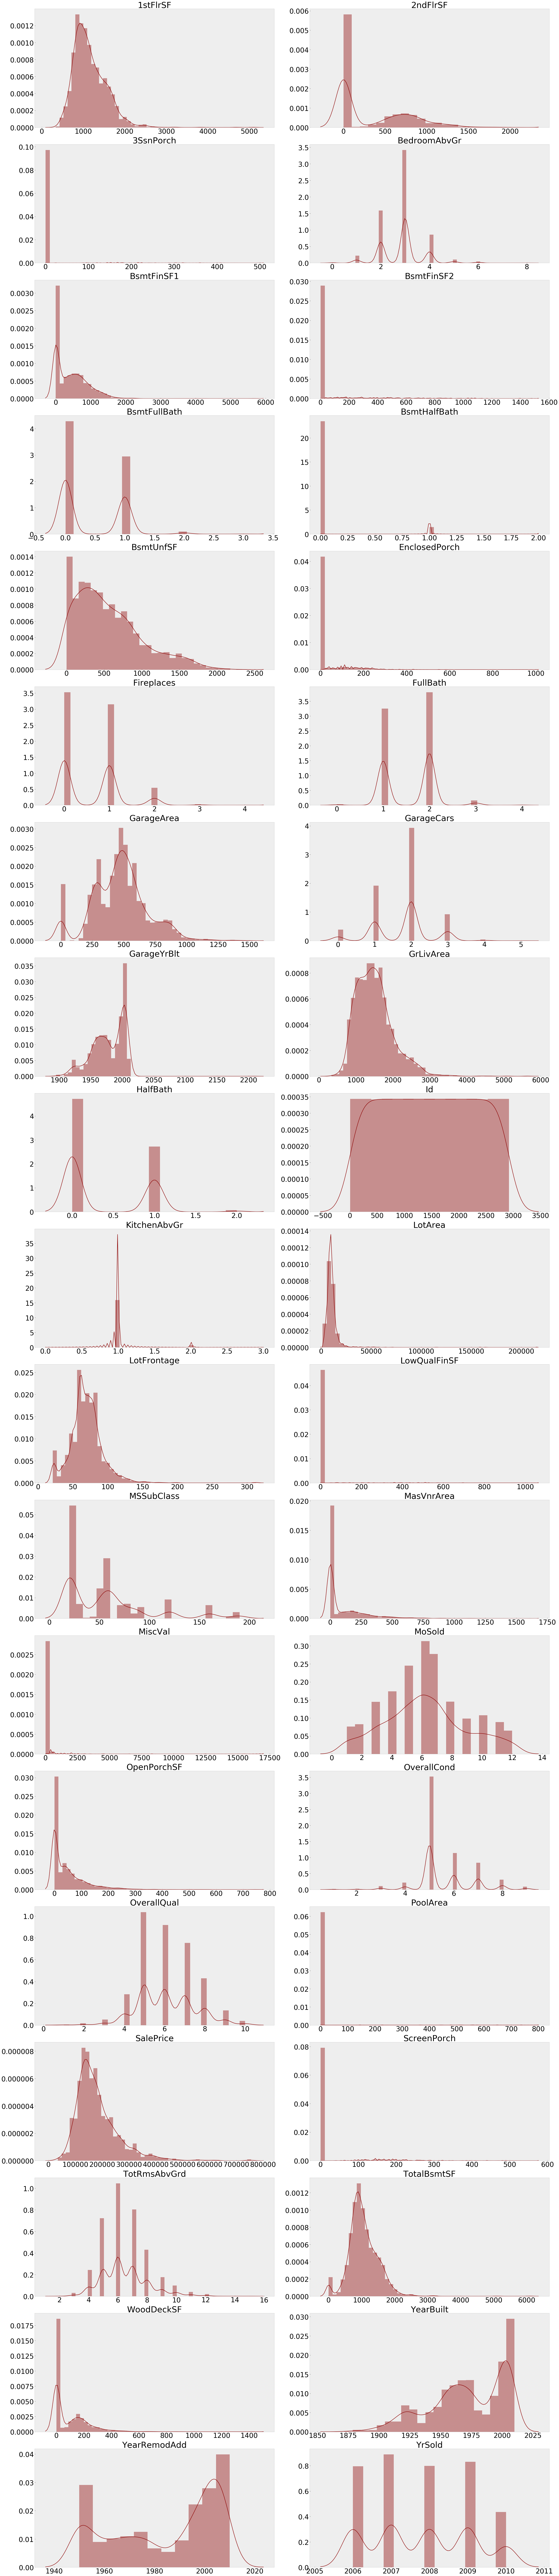

In [10]:
'''Plot histogram of numerical variables to validate pandas intuition.'''
fig, axes = plt.subplots(nrows = 19, ncols = 2, figsize = (40, 200))
for ax, column in zip(axes.flatten(), num_merged.columns):
    sns.distplot(num_merged[column].dropna(), ax = ax, color = 'darkred')
    ax.set_title(column, fontsize = 43)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 35)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 35)
    ax.set_xlabel('')
fig.tight_layout(rect = [0, 0.03, 1, 0.95])

Well we can clearly see some distributions are continuous (like LotFrontage, LotArea, and  YearBuilt) and some are discrete (like MSSubClass, OverallQual, OverallCond, BsmtFullBath, and HalfBath etc.). Let's correct the data types accordingly. Reading data description we see some variables are actually categorical (like like MSSubClass, OverallQual, and OverallCond). **Hence we would explicitly cast them into categorical variables. **For detailed data documentation see [here ](http://ww2.amstat.org/publications/jse/v19n3/Decock/DataDocumentation.txt)

In [11]:
'''Convert MSSubClass, OverallQual, OverallCond, MoSold, YrSold into categorical variables.'''
merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']] = merged.loc[:,['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']].astype('object')

In [12]:
'''Check out the data types after correction'''
bold('**Data types after correction:**')
display(merged.dtypes.value_counts())

**Data types after correction:**

object     48
int64      21
float64    12
dtype: int64

In [13]:
'''Extract train and test data from the combined data set.'''
df_train = merged.iloc[:1460, :].drop(columns = ['Id'], axis = 1)
df_test = merged.iloc[1460:, :].drop(columns = ['Id', 'SalePrice'], axis = 1) # SalePrice due to concatenation

**Now I would like to write 3 functions for different Plotly plots.**

In [14]:
'''Function to plot bar chart'''
def bar_plot(x, y, title, yaxis, c_scale):
    trace = go.Bar(
    x = x,
    y = y,
    marker = dict(color = y, colorscale = c_scale))
    layout = go.Layout(hovermode= 'closest', title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

'''Function to plot scatter plot'''
def scatter_plot(x, y, title, xaxis, yaxis, size, c_scale):
    trace = go.Scatter(
    x = x,
    y = y,
    mode = 'markers',
    marker = dict(color = y, size = size, showscale = True, colorscale = c_scale))
    layout = go.Layout(hovermode= 'closest', title = title, xaxis = dict(title = xaxis), yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)    
    
'''Function to plot histogram'''
def plot_histogram(x, title, yaxis, color):
    trace = go.Histogram(x = x,
                        marker = dict(color = color))
    layout = go.Layout(hovermode= 'closest', title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

# 6.Outliers Treatment <a id="6"></a>
There is a **Special Notes** in data documentation that says, **"There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students"**. ***Let's plot a scatter plot of GrLivArea vs SalePrice first to treat the outliers mentioned. The data documentation can be found [here](http://ww2.amstat.org/publications/jse/v19n3/Decock/DataDocumentation.txt) ***

In [15]:
'''Sactter plot of GrLivArea vs SalePrice.'''
scatter_plot(df_train.GrLivArea, df_train.SalePrice, 'GrLivArea vs SalePrice', 'GrLivArea', 'SalePrice', 10, 'Rainbow')

In [16]:
'''Drop observations where GrLivArea is greater than 4000 sq.ft'''
df_train.drop(df_train[df_train.GrLivArea>4000].index, inplace = True)
df_train.reset_index(drop = True, inplace = True)

In [17]:
'''Plot the sactter plot again of GrLivArea vs SalePrice to see if outliers are gone.'''
scatter_plot(df_train.GrLivArea, df_train.SalePrice, 'GrLivArea vs SalePrice', 'GrLivArea', 'SalePrice', 10, 'Rainbow')

# 7.Imputing Missing Variables <a id="7"></a>
The simpliest way to impute missing values of a variable is to impute its missing values with its mean, median or mode depending on its distribution and variable type(categorical or numerical). By now, we should have a idea about the distribution of the variables and the presence of outliers in those variables. For categorical variables mode-imputation is performed and for numerical variable mean-impuation is performed if its distribution is symmetric(or almost symmetric or normal like Age). On the other hand, for a variable with skewed distribution and outliers, meadian-imputation is recommended as median is more immune to outliers than mean.

However, one clear disadvantage of using mean, median or mode to impute missing values is the addition of bias if the amount of missing values is significant. So simply replacing missing values with the mean or the median might not be the best solution since missing values may differ by groups and categories. To solve this, we can group our data by some variables that have no missing values and for each subset compute the median to impute the missing values of a variable. 

**For this purpose we would merge train and test data together. This will eliminate the hassle of handling train and test data separately thought it might induce some data leakage problem. But in practice, we would not have any test data during model training, so data leakage problem in real world could be avoided. Moreover, all the preprocessings done combinedly lead to better a leaderboard score (may be due to data leakage).**

In [18]:
'''Separate our target variable first.'''
y_train = df_train.SalePrice

'''Drop SalePrice from train data.'''
df_train.drop('SalePrice', axis = 1, inplace = True)

'''Now combine train and test data frame together.'''
df_merged = pd.concat([df_train, df_test], axis = 0)

In [19]:
'''Columns with missing observations.'''
missing_columns = df_merged.columns[df_merged.isnull().any()].values
'''Number of columns with missing observations.'''
total_columns = np.count_nonzero(df_merged.isna().sum())
print('We have ' , total_columns ,  'features with missing values and those features (with missing values) are: \n\n' , missing_columns)

We have  34 features with missing values and those features (with missing values) are: 

 ['Alley' 'BsmtCond' 'BsmtExposure' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtFinType1' 'BsmtFinType2' 'BsmtFullBath' 'BsmtHalfBath' 'BsmtQual'
 'BsmtUnfSF' 'Electrical' 'Exterior1st' 'Exterior2nd' 'Fence'
 'FireplaceQu' 'Functional' 'GarageArea' 'GarageCars' 'GarageCond'
 'GarageFinish' 'GarageQual' 'GarageType' 'GarageYrBlt' 'KitchenQual'
 'LotFrontage' 'MSZoning' 'MasVnrArea' 'MasVnrType' 'MiscFeature' 'PoolQC'
 'SaleType' 'TotalBsmtSF' 'Utilities']


In [20]:
'''Get and plot only the features (with missing values) and their corresponding missing values.'''
missing_columns = len(df_merged) - df_merged.loc[:, np.sum(df_merged.isnull())>0].count()
x = missing_columns.index
y = missing_columns
title = 'Variables with Missing Values'
scatter_plot(x, y, title, 'Features Having Missing Observations','Missing Values', 30, 'Picnic')

Usually we drop a variable if at least 40% of its values are missing. Hence, one might tempt to drop variables like PoolQC, MiscFeature, Alley, Fence, and FirePlaceQu. Deleting these variables would be a blunder because data description tells these 'NaN' has some purpose for those variables. Like 'NaN' in PoolQC refers to  'No Pool', 'NaN' in MiscFeature refers to 'None', and 'NaN' in Alley means 'No alley access' etc. More generally NaN means the absent of that variable. Hence we gonna replace NaN with 'None' in those variable. Please do read data [documentation](http://ww2.amstat.org/publications/jse/v19n3/Decock/DataDocumentation.txt) carefully 

In [21]:
'''Impute by None where NaN means something.'''
to_impute_by_none = df_merged.loc[:, ['PoolQC','MiscFeature','Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageCond','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrType']]
for i in to_impute_by_none.columns:
    df_merged[i].fillna('None', inplace = True)

In [22]:
'''These are categorical variables and will be imputed by mode.'''
to_impute_by_mode = df_merged.loc[:, ['Electrical', 'MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional', 'SaleType']]
for i in to_impute_by_mode.columns:
    df_merged[i].fillna(df_merged[i].mode()[0], inplace = True)

In [23]:
'''The following variables are either discrete numerical or continuous numerical variables.So the will be imputed by median.'''
to_impute_by_median = df_merged.loc[:, ['BsmtFullBath','BsmtHalfBath', 'GarageCars', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']]
for i in to_impute_by_median.columns:
    df_merged[i].fillna(df_merged[i].median(), inplace = True)

In [24]:
'''Columns remaining to be imputed'''
display(df_merged.columns[df_merged.isna().any()].values)

array(['LotFrontage'], dtype=object)

**Almost 17% observations of LotFrontage are missing in. Hence, simply imputing LotFrontage by mean or median might introduce bias since the amount of missing values is significant. Again LotFrontage may differ by different categories of house. To solve this, we can group our data by some variables that have no missing values and for each subset compute the median LotFrontage to impute the missing values of it. This method may result in better accuracy without high bias, unless a missing value is expected to have a very high variance.**

In [25]:
"""Let's create a function to find the variables correlated with LotFrontage"""
def corr(correlation, variable):
    from sklearn.preprocessing import LabelEncoder # Convert categorical variables into numerical
    correlation = correlation.agg(LabelEncoder().fit_transform)
    correlation['LotFrontage'] = variable
    corr = correlation.corr()
    display(corr['LotFrontage'].sort_values(ascending = False)[:5])
    display(corr['LotFrontage'].sort_values(ascending = False)[-5:])

In [26]:
'''Correlation of LotFrontage with categorical data.'''
bold("**LotFrontage's correlation with categorical data:**")
corr(df_merged.select_dtypes(include = ['object']), df_merged.LotFrontage)

**LotFrontage's correlation with categorical data:**

LotFrontage     1.000000
OverallQual     0.204049
RoofStyle       0.180168
Exterior2nd     0.130137
Neighborhood    0.124097
Name: LotFrontage, dtype: float64

LotConfig    -0.191358
GarageType   -0.294884
MSSubClass   -0.396307
BldgType     -0.485279
Utilities          NaN
Name: LotFrontage, dtype: float64

**BldgType has the highest correlation with LotFrontage. So the tactic is to impute missing values of LotFrontage with the median LotFrontage of similar rows according BldgType.**

In [27]:
'''Impute LotFrontage with the median of highest correlated column(i.e., BldgType)'''
df_merged.LotFrontage = df_merged.groupby(['BldgType'])['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [28]:
'''Is there any missing values left untreated??'''
print('Missing variables left untreated: ', df_merged.columns[df_merged.isna().any()].values)

Missing variables left untreated:  []


**Okay, we,re also done with imputation. Now let's head over to transformation distribution.**

# 8.Transformation of Distributions <a id="8"></a>
Normal distribution (bell-shaped) of variables is not only one of the assumptions of regression problems but also a assumption of parametric test (like one-way-anova, t-test etc) and pearson correlation. But in practice, this can not be met perfectly and hence some deviation off this assumption is acceptable. In this section, we would try to make the skewed distribution as normal as possible. Since most of the variables are positively skewed, we would apply log transformation on them. **Let's observe our target variable separately:**

In [29]:
'''Plot the distribution of SalePrice with skewness.'''
title = 'SalePrice without Transformation (skewness: {:0.4f})'.format(y_train.skew())
plot_histogram(y_train, title, 'Abs Frequency', 'darkred')

In [30]:
'''Plot the distribution of SalePrice removing skewness.'''
y_train = np.log1p(y_train)
title = 'SalePrice after Transformation (skewness: {:0.4f})'.format(y_train.skew())
plot_histogram(y_train, title, 'Abs Frequency', 'green')

In [31]:
'''Now calculate and plot the skewness for rest of the explanetory variables.'''
skew_merged = pd.DataFrame(data = df_merged.select_dtypes(include = ['int64', 'float64']).skew(), columns = ['Skewness'])
skew_merged_sorted = skew_merged.sort_values(ascending = False, by = 'Skewness')
bar_plot(skew_merged_sorted.index, skew_merged_sorted.Skewness, 'Skewness in Explanetory Variables', 'Skewness', 'Bluered')

**We can see variables which are skewed are mostly right skewed (except YearBuilt, GarageYrBuilt, GarageCars etc which are slightly skewed) . We would apply log transformation (infact adding 1 before taking log) taking 0.75 as threshold value for transformation. That means we would transform variables that have skewness greater than 0.75.**

In [32]:
'''Extract numeric variables merged data.'''
df_merged_num = df_merged.select_dtypes(include = ['int64', 'float64'])

In [33]:
'''Get the index of the data to be transformed'''
bold('**Features to be transformed (skewness>0.75):**')
display(df_merged_num.skew()[df_merged_num.skew()>0.75].index.values) 
# So these are the variables to be transformed.

**Features to be transformed (skewness>0.75):**

array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'GrLivArea',
       'KitchenAbvGr', 'LotArea', 'LotFrontage', 'LowQualFinSF',
       'MasVnrArea', 'MiscVal', 'OpenPorchSF', 'PoolArea', 'ScreenPorch',
       'WoodDeckSF'], dtype=object)

In [34]:
'''Make the transformation.'''
df_merged_skewed = np.log1p(df_merged_num[df_merged_num.skew()[df_merged_num.skew()>0.75].index])
df_merged_normal = df_merged_num[df_merged_num.skew()[df_merged_num.skew()< 0.75].index] # Normal variables
df_merged_num_all = pd.concat([df_merged_skewed, df_merged_normal], axis = 1)

In [35]:
'''Update numerical variables with transformed variables.'''
df_merged_num.update(df_merged_num_all)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:5085: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



# 9.Bivariate Analysis <a id="9"></a>
Being the most important part, bivariate analysis tries to find the relationship between two variables. We will look for correlation or association between our predictor and target variables. Bivariate analysis is performed for any combination of categorical and numerical variables. The combination can be: Numerical & Numerical, Numerical & Categorical and Categorical & Categorical. For numeric-numeric combination, we would use scatter plot to analyse how strong the correlation is. And for numeric-categorical combinbation, we would use boxplot to see if there is any association between our target and explanatory variables. Since we're dealing with 79 predictor variables, it would not be a good idea to analyse all the variables one by one to find any correlation with SalePrice. We would anylyse only 20 variables that are highly correlated (either positive or negative) with SalePrice. As there are some categorical variables, we need to fit label encoder to have their correlation with target variable and based on this correlation value, we would only choose 20 variables that have the highest correlation (either positive or negative) for further anlysis.

In [36]:
'''Fit label encoder to find the correlated variables.'''
from sklearn.preprocessing import LabelEncoder
df_corr = pd.concat([df_merged.iloc[0:1456, :], y_train], axis = 1)
df_corr = df_corr.agg(LabelEncoder().fit_transform)
df_corr = df_corr.corr()
bold('**Best 10 Positively Correlated Variables:**')
display(df_corr['SalePrice'].sort_values(ascending = False)[:11]) # Best 10 positively correlated
bold('**Best 10 Negatively Correlated Variables:**')
display(df_corr['SalePrice'].sort_values(ascending = False)[-10:]) # Best 10 negatively correlated

**Best 10 Positively Correlated Variables:**

SalePrice       1.000000
OverallQual     0.819885
GrLivArea       0.737118
GarageCars      0.680034
GarageArea      0.664054
TotalBsmtSF     0.633474
YearBuilt       0.618314
FullBath        0.616308
1stFlrSF        0.599499
YearRemodAdd    0.580152
GarageYrBlt     0.532280
Name: SalePrice, dtype: float64

**Best 10 Negatively Correlated Variables:**

KitchenAbvGr   -0.161072
MSZoning       -0.232167
LotShape       -0.292313
BsmtExposure   -0.303445
HeatingQC      -0.448559
GarageFinish   -0.449363
GarageType     -0.513152
KitchenQual    -0.554800
BsmtQual       -0.598646
ExterQual      -0.611179
Name: SalePrice, dtype: float64

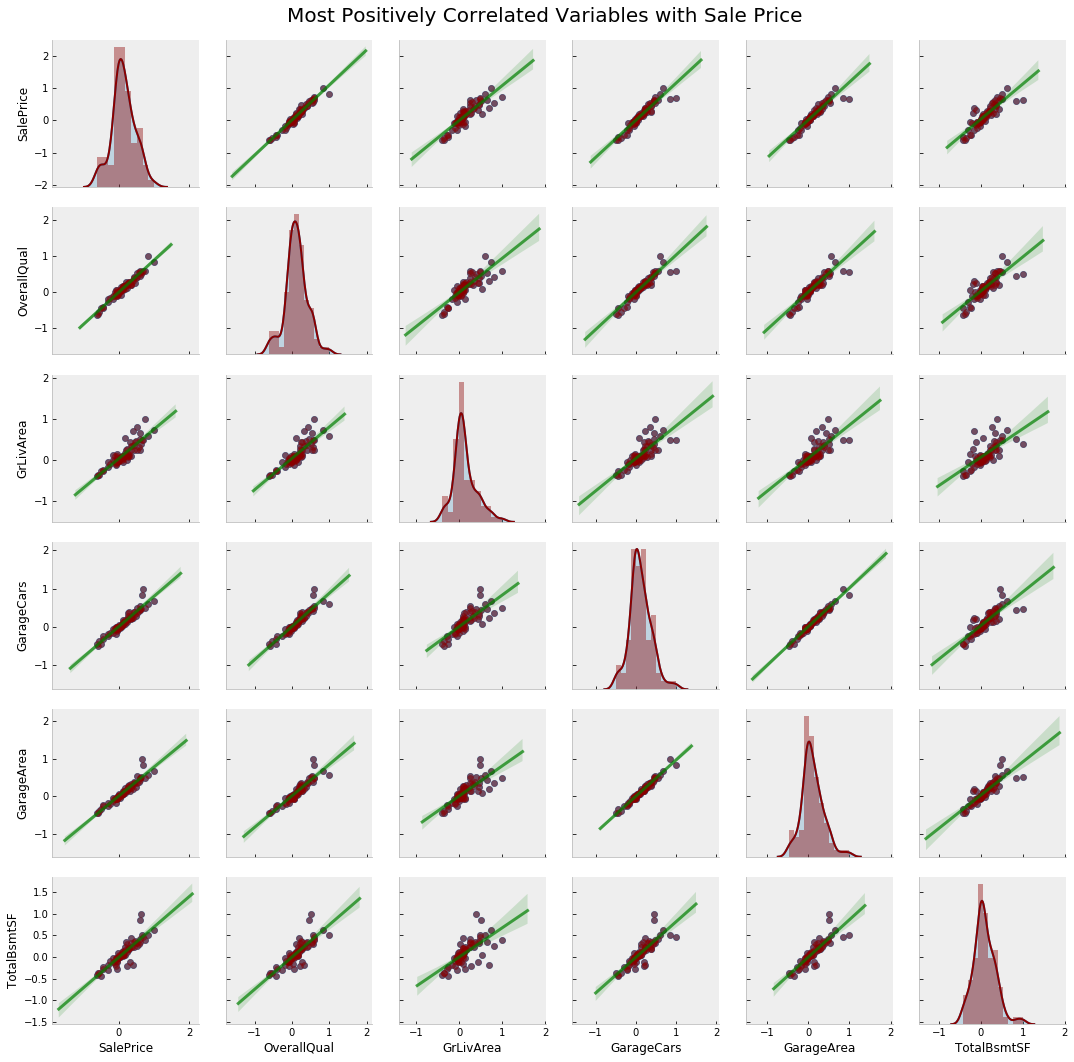

In [37]:
'''We can also create a scatter plot matrix of positively correlated variables (top 5) with SalePrice.'''
corr_positive = df_corr.loc[:, ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']]
g = sns.pairplot(corr_positive, kind = 'reg', diag_kind = 'kde', plot_kws = {'line_kws':{'color':'green', 'alpha': 0.7}}) 
g = g.map_diag(sns.distplot, color = 'darkred')
g = g.map_offdiag(plt.scatter, alpha = 0.5, color = 'darkred')
g.fig.suptitle('Most Positively Correlated Variables with Sale Price', fontsize = 20)
plt.subplots_adjust(top = 0.95)

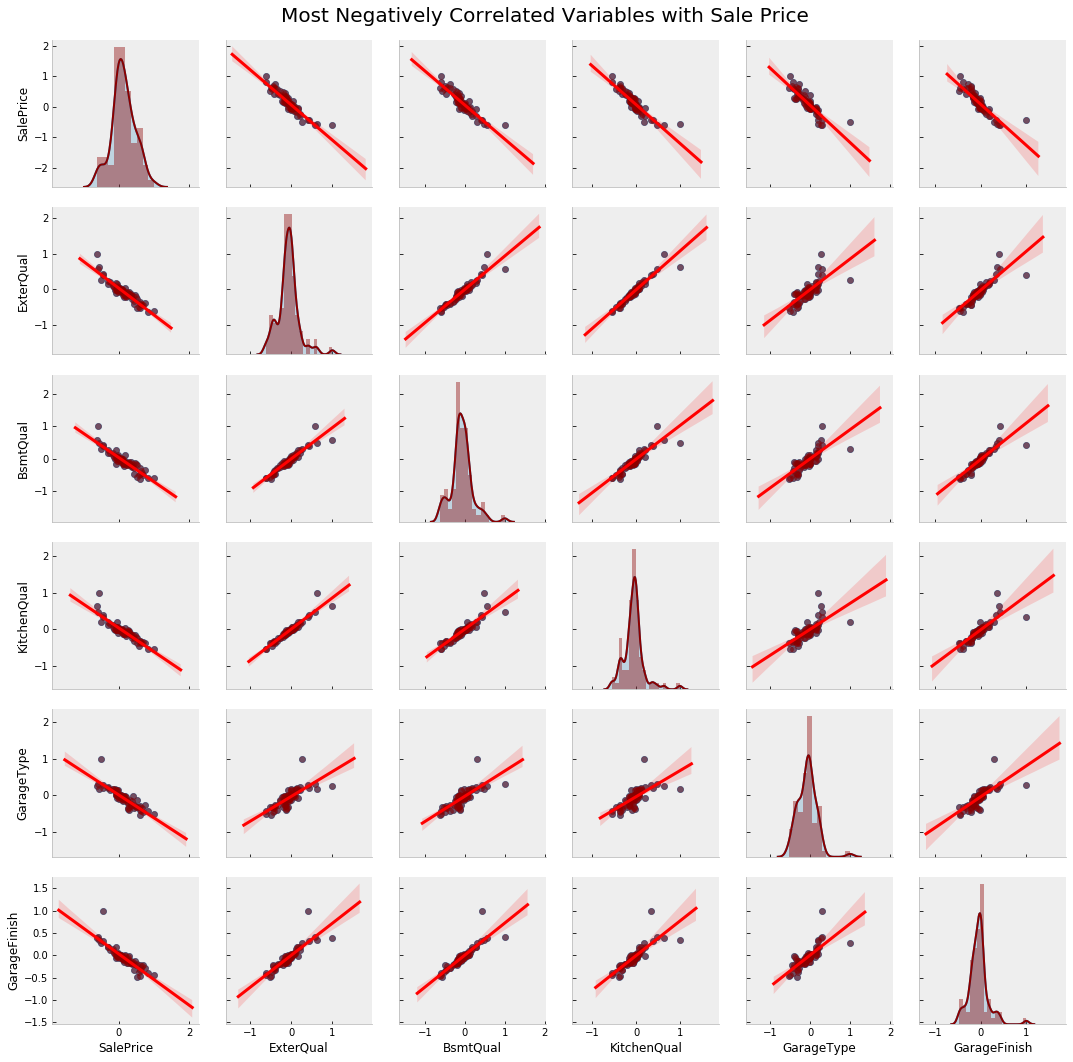

In [38]:
""" In the same way, let's also create a scatter plot matrix of negatively correlated variables (top 5) with SalePrice."""
corr_neg = df_corr.loc[:, ['SalePrice', 'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageType', 'GarageFinish']]
g = sns.pairplot(corr_neg, kind = 'reg', diag_kind = 'kde', plot_kws = {'line_kws':{'color':'red'}})
g = g.map_diag(sns.distplot, color = 'darkred')
g = g.map_offdiag(plt.scatter, alpha = 0.5, color = 'darkred')
g.fig.suptitle('Most Negatively Correlated Variables with Sale Price', fontsize = 20)
plt.subplots_adjust(top = 0.95)

## 9.1 Numerical and Numerical Variable <a id="9.1"></a>
Among these 20 variables, GrLivArea, YearBuilt, GarageArea, TotalBsmtSF, 1stFlrSF, YearRemodAdd, GarageYrBlt are continuous numerical variables. Hence we would investigate how these numerical continuous variables are correlated with our dependent variable SalePrice with the help of regression plot.

In [39]:
'''Plot regression plot to see how SalePrice is correlated with numerical variables.'''
corr_num = df_merged.loc[:, ['GrLivArea', 'YearBuilt', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearRemodAdd', 'GarageYrBlt']]
corr_num = corr_num.iloc[0:1456, :]
for i in corr_num.columns:
    x = corr_num[i]
    y = y_train
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    line = slope*x + intercept

    # Creating the dataset, and generating the plot
    trace0 = go.Scatter(
                  x = x,
                  y = y,
                  mode = 'markers',
                  marker = dict(color = 'red'),
                  name ='Data'
                  )
    
    # Creating regression line
    trace1 = go.Scatter(
                  x = x,
                  y = line,
                  mode='lines',
                  marker = dict(color = 'green'),
                  name='Fit'
                  )

    # Layout for regression plot
    title = '{} vs SalePrice (r: {:0.4f}, p: {})'.format(corr_num[i].name, r_value, p_value)
    layout = go.Layout(
            title = title, yaxis = dict(title = 'SalePrice'))

    data = [trace0, trace1]
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

## 9.2 Categorical  andNumerical Variable <a id="9.2"></a>
A boxplot between our numerical and categorical variables helps to reveal if the distribution of numerical variable is distinct in different classes of nominal variables. More specifically, how SalePrice (strongly or weakly) is associated with these categorical variables. Among the 20 variables, OverallQual, GarageCars, FullBath, ExterQual, BsmtQual, KitchenQual, GarageType, GarageFinish, HeatingQC, BsmtExposure, LotShape, MSZoning, KitchenAbvGr are categorical variables that are highly correlated (either positively or negatively) with SalePrice.

In [40]:
'''Create boxplots to see the association between categorical and target variables.'''
corr_cat = df_merged.loc[:, ['OverallQual', 'GarageCars', 'FullBath', 'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageType', 'GarageFinish', 'HeatingQC', 'BsmtExposure', 'LotShape', 'MSZoning', 'KitchenAbvGr']]
corr_cat = corr_cat.iloc[0:1456, :]
for i in corr_cat.columns:
    trace = go.Box(x = corr_cat[i], y = y_train, marker = dict (color = 'magenta'))
    data = [trace]
    layout = go.Layout(title = '{} vs SalePrice'.format(i), yaxis = dict(title = 'SalePrice'))
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

Since thse variables are highly associated with SalePrice, mean SalePrice should be different across the classes (groups) of these categorical variables. We can visualize this pattern using pivot table. 

In [41]:
'''Create pivot table to see if mean SalePrice varries across groups of categorical variables.'''
pivot_df = pd.concat([corr_cat, y_train], axis = 1)
for i in corr_cat.columns:
    pivot_table = pivot_df.pivot_table(index = i, values = 'SalePrice', aggfunc = np.mean)
    bar_plot(pivot_table.index, pivot_table.SalePrice, '{} vs Mean SalePrice'.format(i), 'Mean SalePrice', 'Rainbow')

**Mean SalePrice is distinct across the groups of our different categorical variables and hence they have high correlation with SalePrice.**

# 10.Feature Engineering <a id="10"></a>

## 10.1 Creating New Features <a id="10.1"></a>
We would create a new feature named TotalSF combining TotalBsmtSF, 1stFlrSF, and 2ndFlrSF.

In [42]:
'''Create Feature TotalSF'''
df_merged_num['TotalSF'] = df_merged_num['TotalBsmtSF'] + df_merged_num['1stFlrSF'] + df_merged_num['2ndFlrSF']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



## 10.2 Feature Scaling <a id="10.2"></a>
Two methods are usually well known for rescaling data, i.e., normalization and standarization. Normalization scales all numeric variables in the range [0,1]. So outliers might be lost. On the other hand, standarization transforms data to have zero mean and unit variance. Feature scaling helps gradient descent converge faster, thus reducing training time. Its not necessary to standarize the target variable. However, due to the presence of outliers, we would use sklearn's RobustScaler since it is not affected by outliers. **For more see the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)**

In [43]:
'''Standarize numeric features with RobustScaler'''
from sklearn.preprocessing import RobustScaler

'''Initialize robust scaler object.'''
robust_scl = RobustScaler()

'''Fit scaler object on train data.'''
robust_scl.fit(df_merged_num)

'''Apply scaler object to both train and test data.'''
df_merged_num_scaled = robust_scl.transform(df_merged_num)

In [44]:
'''Retrive column names'''
df_merged_num_scaled = pd.DataFrame(data = df_merged_num_scaled, columns = df_merged_num.columns, index = df_merged_num.index)
# Pass the index of index df_merged_num, otherwise it will sum up the index.

## 10.3 Encoding Categorical Variables  <a id="10.3"></a>
We have to encode categorical variables for our machine learning algorithms to interpret them. We would use label encoding and then one hot encoding.

### 10.3.1 Label Encoding <a id="10.3.1"></a>
**We would like to encode some categorical (ordinal) variables to preserve their ordinality. If we use sklearn's label encoder, it will randomly encode these ordinal variables and therefore ordinality would be lost. To overcome this, we will use pandas replace method to manually encode orninal variables. Variables like LotShape, LandContour, Utilities, LandSlope, OverallQual (already encoded), OverallCond (already encoded), ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, HeatingQC, BsmtFinType2, Electrical, KitchenQual, Functional, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence have inherent orders. Let's encode them. Don't get bored if you fell exhausted in the process.**

In [45]:
"""Let's extract categorical variables first and convert them into category."""
df_merged_cat = df_merged.select_dtypes(include = ['object']).astype('category')

"""let's begin the tedious process of label encoding."""
df_merged_cat.LotShape.replace(to_replace = ['IR3', 'IR2', 'IR1', 'Reg'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.LandContour.replace(to_replace = ['Low', 'Bnk', 'HLS', 'Lvl'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Utilities.replace(to_replace = ['NoSeWa', 'AllPub'], value = [0, 1], inplace = True)
df_merged_cat.LandSlope.replace(to_replace = ['Sev', 'Mod', 'Gtl'], value = [0, 1, 2], inplace = True)
df_merged_cat.ExterQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.ExterCond.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtQual.replace(to_replace = ['None', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtCond.replace(to_replace = ['None', 'Po', 'Fa', 'TA', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtExposure.replace(to_replace = ['None', 'No', 'Mn', 'Av', 'Gd'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.BsmtFinType1.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.BsmtFinType2.replace(to_replace = ['None', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.HeatingQC.replace(to_replace = ['Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.Electrical.replace(to_replace = ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr'], value = [0, 1, 2, 3, 4], inplace = True)
df_merged_cat.KitchenQual.replace(to_replace = ['Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Functional.replace(to_replace = ['Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'], value = [0, 1, 2, 3, 4, 5, 6], inplace = True)
df_merged_cat.FireplaceQu.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.GarageFinish.replace(to_replace =  ['None', 'Unf', 'RFn', 'Fin'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.GarageQual.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.GarageCond.replace(to_replace =  ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], value = [0, 1, 2, 3, 4, 5], inplace = True)
df_merged_cat.PavedDrive.replace(to_replace =  ['N', 'P', 'Y'], value = [0, 1, 2], inplace = True)
df_merged_cat.PoolQC.replace(to_replace =  ['None', 'Fa', 'Gd', 'Ex'], value = [0, 1, 2, 3], inplace = True)
df_merged_cat.Fence.replace(to_replace =  ['None', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv'], value = [0, 1, 2, 3, 4], inplace = True)

In [46]:
'''All the encodeded variables have int64 dtype except OverallQual and OverallCond. So convert them back into int64.'''
df_merged_cat.loc[:, ['OverallQual', 'OverallCond']] = df_merged_cat.loc[:, ['OverallQual', 'OverallCond']].astype('int64')

'''Extract label encoded variables'''
df_merged_label_encoded = df_merged_cat.select_dtypes(include = ['int64'])

### 10.3.2 One Hot Encoding <a id="10.3.2"></a>
Categorical variables without any inherent order will be converted into numerical for our model using pandas get_dummies method. So basically variables in df_merged_cat data frame with category dtypes are nominal variables for one hot encoding.

In [47]:
'''Now extract the nominal variables for one hot encoding.'''
df_merged_one_hot = df_merged_cat.select_dtypes(include = ['category'])
df_merged_one_hot = pd.get_dummies(df_merged_one_hot)

In [48]:
"""Let's concate one hot encoded and label encoded variables together."""
df_merged_encoded = pd.concat([df_merged_one_hot, df_merged_label_encoded], axis = 1)

'''Finally join processed categorical and numerical variables.'''
df_merged_processed = pd.concat([df_merged_num_scaled, df_merged_encoded], axis = 1)

In [49]:
'''Now retrive train and test data for modelling.'''
df_train_final = df_merged_processed.iloc[0:1456, :]
df_test_final = df_merged_processed.iloc[1456:, :]

'''And we have our target variable as y_train.'''
y_train = y_train

In [50]:

"""Let's look at our final train and test data for modelling."""
bold('**Updated train data for modelling:**')
display(df_train_final.head(3))
bold('**Updated test data for modelling:**')
display(df_test_final.head(3))

**Updated train data for modelling:**

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0 -0.512612  1.029526        0.0           0.0    0.098563         0.0   
1  0.336748  0.000000        0.0           0.0    0.147903         0.0   
2 -0.354872  1.031651        0.0           0.0    0.042059         0.0   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch    ...      HeatingQC  \
0           1.0      0.000000  -0.875494            0.0    ...              4   
1           0.0      0.693147  -0.383868            0.0    ...              4   
2           1.0      0.000000  -0.056594            0.0    ...              4   

   KitchenQual  LandContour  LandSlope  LotShape  OverallCond  OverallQual  \
0            2            3          2         3            5            7   
1            1            3          2         3            8            6   
2            2            3          2         2            5            7   

   PavedDrive  PoolQC  Utilities  
0           2       0          1  
1           2       0          1  
2           2       0          1  

[3 rows x 248 columns]

**Updated test data for modelling:**

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0 -0.412702  0.000000        0.0          -1.0    0.036350    4.976734   
1  0.449956  0.000000        0.0           0.0    0.139138    0.000000   
2 -0.335930  0.999458        0.0           0.0    0.115772    0.000000   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch    ...      HeatingQC  \
0           0.0           0.0  -0.422852            0.0    ...              2   
1           0.0           0.0  -0.108087            0.0    ...              2   
2           0.0           0.0  -0.945170            0.0    ...              3   

   KitchenQual  LandContour  LandSlope  LotShape  OverallCond  OverallQual  \
0            1            3          2         3            6            5   
1            2            3          2         2            6            6   
2            1            3          2         2            5            5   

   PavedDrive  PoolQC  Utilities  
0           2       0          1  
1           2       0          1  
2           2       0          1  

[3 rows x 248 columns]

# 11.Model Building & Evaluation <a id="11"></a>
With all the preprocessings done and dusted, we're ready to train our regression models with the processed data.

In [51]:
"""Let's have a final look at our data"""
bold('**Data Dimension for Model Building:**')
print('Input matrix dimension:', df_train_final.shape)
print('Output vector dimension:',y_train.shape)
print('Test data dimension:', df_test_final.shape)

**Data Dimension for Model Building:**

Input matrix dimension: (1456, 248)
Output vector dimension: (1456,)
Test data dimension: (1459, 248)


## 11.1 Model Training <a id="11.1"></a>

In [52]:
'''Set a seed for reproducibility'''
seed = 43

'''Initialize all the regression models object we are interested in.'''
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


'''We are interested in the following 14 regression models.
All initialized with default parameters except random_state and n_jobs.'''
linear = LinearRegression(n_jobs = -1)
lasso = Lasso(random_state = seed)
ridge = Ridge(random_state = seed)
kr = KernelRidge()
elnt = ElasticNet(random_state = seed)
dt = DecisionTreeRegressor(random_state = seed)
svm = SVR()
knn = KNeighborsRegressor(n_jobs = -1)
rf =  RandomForestRegressor(n_jobs = -1, random_state = seed)
et = ExtraTreesRegressor(n_jobs = -1, random_state = seed)
ab = AdaBoostRegressor(random_state = seed)
gb = GradientBoostingRegressor(random_state = seed)
xgb = XGBRegressor(random_state = seed, n_jobs = -1)
lgb = LGBMRegressor(random_state = seed, n_jobs = -1)

In [53]:
'''Training accuracy of our regression models. By default score method returns coefficient of determination (r_squared).'''
def train_r2(model):
    model.fit(df_train_final, y_train)
    return model.score(df_train_final, y_train)

'''Calculate and plot the training accuracy.'''
models = [linear, lasso, ridge, kr, elnt, dt, svm, knn, rf, et, ab, gb, xgb, lgb]
training_score = []
for model in models:
    training_score.append(train_r2(model))
    
'''Plot dataframe of training accuracy.'''
train_score = pd.DataFrame(data = training_score, columns = ['Training_R2'])
train_score.index = ['LR', 'LSO', 'RIDGE', 'KR', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']
train_score = (train_score*100).round(4)
scatter_plot(train_score.index, train_score['Training_R2'], 'Training Score (R_Squared)', 'Models','% Training Score', 30, 'Rainbow')

[07:04:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


**Being a regression problem, score method returns r_squared(coefficients of determination) and hence bigger is better. Looks like DT and ET have exactly r2_score of 100%. Usually higher r2_score is better but r2_score very close to 1 might indicate overfitting. But train accuracy of a model is not enough to tell if a model can be able to generalize the unseen data or not. Because training data is something our model has been trained with, i.e., data our model has already seen it. We all know that, the purpose of building a machine learning model is to generalize the unseen data, i.e., data our model has not yet seen. Hence we can't use training accuracy for our model evaluation rather we must know how our model will perform on the data our model is yet to see.**

## 11.2 Model Evaluation <a id="11.2"></a>
So basically, to evaluate a model's performance, we need some data (input) for which we know the ground truth(label). For this problem, we don't know the ground truth for the test set but we do know for the train set. So the idea is to train and evaluate the model performance on different data. One thing we can do is to split the train set in two groups, usually in 80:20 ratio. That means we would train our model on 80% of the training data and we reserve the rest 20% for evaluating the model since we know the ground truth for this 20% data. Then we can compare our model prediction with this ground truth (for 20% data). That's how we can tell how our model would perform on unseen data. This is the first model evaluation technique. In sklearn we have a train_test_split method for that. Let's evaluate our model using train_test_split method. **Note: From now on, we will be using root mean squared error as the evaluation metric for this problem. So smaller is better.**

In [54]:
'''Evaluate models on the holdout set(say on 30%).'''
def train_test_split_score(model):
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(df_train_final, y_train, test_size = 0.3, random_state = seed)
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    mse = mean_squared_error(prediction, Y_test)
    rmse = np.sqrt(mse)
    return rmse

'''Calculate train_test_split score of differnt models and plot them.'''
models = [lasso, ridge, kr, elnt, dt, svm, knn, rf, et, ab, gb, xgb, lgb]
train_test_split_rmse = []
for model in models:
    train_test_split_rmse.append(train_test_split_score(model))

'''Plot data frame of train test rmse'''
train_test_score = pd.DataFrame(data = train_test_split_rmse, columns = ['Train_Test_RMSE'])
train_test_score.index = ['LSO', 'RIDGE', 'KR', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']
train_test_score = train_test_score.round(5)
x = train_test_score.index
y = train_test_score['Train_Test_RMSE']
title = "Models' Test Score (RMSE) on Holdout(30%) Set"
scatter_plot(x, y, title, 'Models','RMSE', 30, 'RdBu')

[07:04:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


**Being root mean squared error, smaller is better. Looks like, SVM is the best regression model followed by Ridge, GB and XGB. Unfortunately, LR can't find any linear pattern, hence it performs worst and hence discarded.** 

However, train_test split has its drawbacks. Because this approach introduces bias as we are not using all of our observations for testing and also we're reducing the train data size. To overcome this we can use a technique called cross validation where all the data is used for training and testing periodically. Thus we may reduce the bias introduced by train_test_split. From different cross validation methods, we would use k-fold cross validation. In sklearn we have a method cross_val_score for calculating k-fold cross validation score.

However, as the train set gets larger, train_test_split has its advantage over k-fold cross validation. Train_test_split is k-times faster than k-fold cross validation. If the training set is very large, both train_test_split and k-fold cross validation perform identically. So for a large training data, train_test_split is prefered over k-fold cross validation to accelerate the training process.

### 11.2.1 K-Fold Cross Validation <a id="11.2.1"></a>
Let's say we will use 10-fold cross validation. So k = 10 and we have total 1456 observations. Each fold would have 1456/10 = 145.6 observations. So basically k-fold cross validation uses fold-1 (145.6 samples) as the testing set and k-1 (9 folds) as the training sets and calculates test accuracy.This procedure is repeated k times (if k = 10, then 10 times); each time, a different group of observations is treated as a validation or test set. This process results in k estimates of the test accuracy which are then averaged out.

In [55]:
'''Function to compute cross validation scores.'''
def cross_validate(model):
    from sklearn.model_selection import cross_val_score
    neg_x_val_score = cross_val_score(model, df_train_final, y_train, cv = 10, n_jobs = -1, scoring = 'neg_mean_squared_error')
    x_val_score = np.round(np.sqrt(-1*neg_x_val_score), 5)
    return x_val_score.mean()

'''Calculate cross validation score of differnt models and plot them.'''
models = [lasso, ridge, kr, elnt, dt, svm, knn, rf, et, ab, gb, xgb, lgb]
cross_val_scores = []
for model in models:
    cross_val_scores.append(cross_validate(model))

'''Plot data frame of cross validation scores.'''
x_val_score = pd.DataFrame(data = cross_val_scores, columns = ['Cross Validation Scores (RMSE)'])
x_val_score.index = ['LSO', 'RIDGE', 'KR', 'ELNT', 'DT', 'SVM', 'KNN', 'RF', 'ET', 'AB', 'GB', 'XGB', 'LGB']
x_val_score = x_val_score.round(5)
x = x_val_score.index
y = x_val_score['Cross Validation Scores (RMSE)']
title = "Models' 10-fold Cross Validation Scores (RMSE)"
scatter_plot(x, y, title, 'Models','RMSE', 30, 'Viridis')

**Looks like Ridge has managed to beat SVM as the best regression model on 10-fold cross validation. And rmse of GB, XGB, and LGB have also dropped from previous holdout set's rmse.**

### 11.2.2 Optimizing Hyperparameters <a id="11.2.2"></a>
Now let's add *Grid Search* to all the models with the hopes of optimizing their hyperparameters and thus improving their accuracy. Are the default model parameters the best bet? Let's find out.

Note: Though optimizing hyperparameters is time consuming, hyperparameters should be tuned for all the models you try because only then you will be able to tell what is the best you can get out of that particular model.

In [56]:
def grid_search_cv(model, params):
    global best_params, best_score
    from sklearn.model_selection import GridSearchCV
    grid_search = GridSearchCV(estimator = model, param_grid = params, cv = 10, verbose = 1,
                            scoring = 'neg_mean_squared_error', n_jobs = -1)
    grid_search.fit(df_train_final, y_train)
    best_params = grid_search.best_params_ 
    best_score = np.sqrt(-1*(np.round(grid_search.best_score_, 5)))
    return best_params, best_score

#### 11.2.2.1 Optimize Lasso

In [57]:
''''Define hyperparameters of lasso.'''
alpha = [0.0001, 0.0002, 0.00025, 0.0003, 0.00031, 0.00032, 0.00033, 0.00034, 0.00035, 0.00036, 0.00037, 0.00038, 
         0.0004, 0.00045, 0.0005, 0.00055, 0.0006, 0.0008,  0.001, 0.002, 0.005, 0.007, 0.008, 0.01]

lasso_params = {'alpha': alpha,
               'random_state':[seed]}

grid_search_cv(lasso, lasso_params)
lasso_best_params, lasso_best_score = best_params, best_score
print('Lasso best params:{} & best_score:{:0.5f}' .format(lasso_best_params, lasso_best_score))

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.7s


Lasso best params:{'alpha': 0.00033, 'random_state': 43} & best_score:0.10932


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    6.1s finished


#### 11.2.2.2 Optimize Ridge

In [58]:
''''Define hyperparameters of ridge.'''
ridge_params = {'alpha':[ 9, 9.2, 9.4, 9.5, 9.52, 9.54, 9.56, 9.58, 9.6, 9.62, 9.64, 9.66, 9.68, 9.7,  9.8],
               'random_state':[seed]}

grid_search_cv(ridge, ridge_params)
ridge_best_params, ridge_best_score = best_params, best_score
print('Ridge best params:{} & best_score:{:0.5f}' .format(ridge_best_params, ridge_best_score))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 15 candidates, totalling 150 fits
Ridge best params:{'alpha': 9.64, 'random_state': 43} & best_score:0.11077


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.9s finished


#### 11.2.2.3 Optimize Kernel Ridge

In [59]:
'''Define hyperparameters of kernel ridge'''
kernel_params = {'alpha':[0.27, 0.28, 0.29, 0.3],
                'kernel':['polynomial', 'linear'], 
                'degree':[2, 3],
                'coef0':[3.5, 4, 4.2]}
grid_search_cv(kr, kernel_params)
kernel_best_params, kernel_best_score = best_params, best_score
print('Kernel Ridge best params:{} & best_score:{:0.5f}' .format(kernel_best_params, kernel_best_score))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   22.0s


Kernel Ridge best params:{'alpha': 0.28, 'coef0': 4, 'degree': 2, 'kernel': 'polynomial'} & best_score:0.10854


[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:   28.0s finished


#### 11.2.2.4 Optimize Elastic Net

In [60]:
'''Define hyperparameters of Elastic net.'''
elastic_params = {'alpha': [ 0.0003, 0.00035, 0.00045, 0.0005], 
                 'l1_ratio': [0.80, 0.85, 0.9, 0.95],
                 'random_state':[seed]}
grid_search_cv(elnt, elastic_params)
elastic_best_params, elastic_best_score = best_params, best_score
print('Elastic Net best params:{} & best_score:{:0.5f}' .format(elastic_best_params, elastic_best_score))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 16 candidates, totalling 160 fits
Elastic Net best params:{'alpha': 0.00035, 'l1_ratio': 0.95, 'random_state': 43} & best_score:0.10932


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    3.0s finished


#### 11.2.2.5 Optimize Support Vector Machine

In [61]:
'''Define hyperparameters of support vector machine'''
svm_params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], # precomputed is omitted from kernel to avoid error.
    'C': [4, 5], 
    'gamma':[0.0001, 0.001]}

grid_search_cv(svm, svm_params)
svm_best_params, svm_best_score = best_params, best_score
print('SVM best params:{} & best_score:{:0.5f}' .format(svm_best_params, svm_best_score))
# Don't bother it takes some time. Training is usually more slower in svm.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  6.3min finished


SVM best params:{'C': 5, 'gamma': 0.001, 'kernel': 'rbf'} & best_score:0.11162


#### 11.2.2.6 Optimize XGB, GB, and LGB
**For computational restrictions and time limit, I won't optimize xgb, gb and lgb models. I also reckon some models like DT, KNN won't do any better after optimization since they have poor cross validation scores. The following hyperparameters of xgb, gb and lgb are found after a bit of experiments. If you have resources and time, I would encourage you to try to optimize these models yourself and see how they perform.**

In [62]:
'''Hyperparameters of xgb'''
xgb_opt = XGBRegressor(colsample_bytree = 0.4603, gamma = 0.0468, 
                             learning_rate = 0.04, max_depth = 3, 
                             min_child_weight = 1.7817, n_estimators = 2500,
                             reg_alpha = 0.4640, reg_lambda = 0.8571,
                             subsample = 0.5213, silent = 1,
                             nthread = -1, random_state = 7)

'''Hyperparameters of gb'''
gb_opt = GradientBoostingRegressor(n_estimators = 3000, learning_rate = 0.05,
                                   max_depth = 4, max_features = 'sqrt',
                                   min_samples_leaf = 15, min_samples_split = 10, 
                                   loss = 'huber', random_state = seed)
'''Hyperparameters of lgb'''
lgb_opt = LGBMRegressor(objective = 'regression', num_leaves = 5,
                              learning_rate=0.05, n_estimators = 660,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed = 9, bagging_seed = 9,
                              min_data_in_leaf = 6, min_sum_hessian_in_leaf = 11)

'''We can assume these 3 model best score is equal to cross validation scores.
Thought it might not be precise, but I will take it'''
xgb_best_score = cross_validate(xgb_opt)
gb_best_score = cross_validate(gb_opt)
lgb_best_score = cross_validate(lgb_opt)

In [63]:
"""Let's plot the models' rmse after optimization."""
optimized_scores = pd.DataFrame({'Optimized Scores':np.round([lasso_best_score, ridge_best_score, kernel_best_score, 
                  elastic_best_score, svm_best_score, xgb_best_score, gb_best_score, lgb_best_score], 5)})
optimized_scores.index = ['Lasso', 'Ridge', 'Kernel_ridge', 'E_net', 'SVM', 'XGB', 'GB', 'LGB']
optimized_scores.sort_values(by = 'Optimized Scores')
scatter_plot(optimized_scores.index, optimized_scores['Optimized Scores'], "Models' Scores after Optimization", 'Models','Optimized Scores', 40, 'Rainbow')

**Looks like kernel ridge is the best model after optimization. Lasso and elastic net score exactly identical. LGB and GB scores the worst among five models after optimization.**

### 11.2.3 Retrain and Predict Using Best Hyperparameters <a id="11.2.3"></a>
Now we would like to retrain our  models using the best parameters responsible for best rmse after optimization. Then we would predict on test data to see how different models perform on leaderboard.

In [64]:
'''Initialize 8 object models with best hyperparameters'''
lasso_opt = Lasso(**lasso_best_params)
ridge_opt = Ridge(**ridge_best_params)
kernel_ridge_opt = KernelRidge(**kernel_best_params)
elastic_net_opt = ElasticNet(**elastic_best_params)
svm_opt = SVR(**svm_best_params)
xgb_opt = xgb_opt
gb_opt = gb_opt
lgb_opt = lgb_opt

In [65]:
'''Now train and predict with optimized models'''
def predict_with_optimized_models(model):
    model.fit(df_train_final, y_train)
    y_pred = np.expm1(model.predict(df_test_final))
    submission = pd.DataFrame()
    submission['Id']= test.Id
    submission['SalePrice'] = y_pred
    return submission

'''Make submission with optimized lasso, ridge, kernel_ridge, elastic_net and svm, xgb, gb, and lgb.'''
predict_with_optimized_models(lasso_opt).to_csv('lasso_optimized.csv', index = False)
predict_with_optimized_models(ridge_opt).to_csv('ridge_optimized.csv', index = False)
predict_with_optimized_models(kernel_ridge_opt).to_csv('kernel_ridge_optimized.csv', index = False)
predict_with_optimized_models(elastic_net_opt).to_csv('elastic_net_optimized.csv', index = False)
predict_with_optimized_models(svm_opt).to_csv('svm_opt_optimized.csv', index = False)
predict_with_optimized_models(xgb_opt).to_csv('xgb_optimized.csv', index = False)
predict_with_optimized_models(gb_opt).to_csv('gb_optimized.csv', index = False)
predict_with_optimized_models(lgb_opt).to_csv('lgb_optimized.csv', index = False)

**Okay then 8 csv files are created to make submission. Let's see how much they can score on kaggle leaderboard.**

In [66]:
'''Plot the leaderboard results.'''
scores_on_submission = pd.DataFrame({'Leaderboard_score':[0.12193, 0.12005, 0.11786, 0.12190, 0.12057, 0.12764, 0.12234, 0.12188]})
scores_on_submission.index = ['Opt_lasso', 'Opt_ridge', 'Opt_kernel_ridge', 'Opt_elastic_net', 'Opt_svm', 'Opt_xgb', 'Opt_gb', 'Opt_lgb']
scores_on_submission.sort_values(by = 'Leaderboard_score')
scatter_plot(scores_on_submission.index, scores_on_submission['Leaderboard_score'], 'Leaderboard Scores after Optimization','Models', 'Optimized Scores', 40, 'Greens')

**Here we go! Its kernel ridge that scores best (0.11786) on leaderboard after optimization, followed by ridge and svm. The xgb scores worst among the 8 models.**

### 11.2.4 Feature Importance <a id="11.2.4"></a>
Do all these 8 models give equal importance to every features? Of course not! We would try to visualize feature importance given by every model except svm. Since svm is not using linear kernel, its feature importance can not be derived.

In [67]:
'''Function to plot scatter plot of feature importance of lasso, ridge and elastic net.'''
def plot_feature_importance(model, title):
    model.fit(df_train_final, y_train)
    coef = pd.DataFrame({'Feature':df_train_final.columns,'Importance':np.transpose(model.coef_)})
    coef = coef.set_index('Feature')
    trace = go.Scatter(x = coef.index, y = coef.Importance, mode = 'markers',
            marker = dict(color = np.random.randn(500), size = 20, showscale = True, colorscale = 'Hot'))
    layout = go.Layout(hovermode = 'closest', title = title, yaxis = dict(title = 'Importance'))
    fig = go.Figure(data = [trace], layout = layout)
    iplot(fig)

'''Now plot feature importance of optimized lasso, ridge, and elastic net.'''
plot_feature_importance(lasso_opt, 'Lasso Feature Importance')
plot_feature_importance(ridge_opt, 'Ridge Feature Importance')
plot_feature_importance(elastic_net_opt, 'ElasticNet Feature Importance')

**Looks like GrLivArea is the the most positively correlated factor for SalePrice while MSZoning_C(all) is the most inversely correlated factors for SalePrice for all the three models.**

In [68]:
'''Now plot feature importance given by xgb, gb, and lgb.'''
def plot_featute_importance(model, title):
    importance = pd.DataFrame({'Features': df_train_final.columns, 'Importance': model.feature_importances_})
    importance = importance.set_index('Features')
    trace = go.Scatter(x = importance.index, y = importance.Importance, mode = 'markers',
                      marker = dict(color = np.random.randn(500), size = 20, showscale = True, colorscale = 'Rainbow'))
    layout = go.Layout(hovermode = 'closest', title = title, yaxis = dict(title = 'Importance'))
    fig = go.Figure(data = [trace], layout = layout)
    iplot(fig)
    
plot_featute_importance(xgb_opt, 'XGB Feature Importance')
plot_featute_importance(gb_opt, 'GB Feature Importance')
plot_featute_importance(lgb_opt, 'LGB Feature Importance')

**GrLivArea and LotArea seem to be most importance features given by xgb, gb, and lgb.**

### 11.2.5 Learning Curves <a id="11.2.5"></a>
Plot learning curves to see the bias-variance tradeoff of our models.

In [69]:
'''Create a function to plot learning curves.'''
def plot_learning_curve(model):
    from sklearn.model_selection import learning_curve
    
    # df_train_final is training matrix and y_train is target matrix.
    # Create CV training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(model, df_train_final, y_train, 
                                            train_sizes = np.linspace(0.01, 1.0, 20), cv = 10, scoring = 'neg_mean_squared_error', 
                                            n_jobs = -1, random_state = seed)
    
    
    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)  
    
    # Draw lines
    plt.plot(train_sizes, train_mean, 'o-', color = 'red',  label = 'Training score')
    plt.plot(train_sizes, test_mean, 'o-', color = 'green', label = 'Cross-validation score')
    
    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha = 0.1, color = 'r') # Alpha controls band transparency.
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha = 0.1, color = 'g')
    
    
    # Create plot
    font_size = 12
    plt.xlabel('Training Set Size', fontsize = font_size)
    plt.ylabel('Accuracy Score', fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.legend(loc = 'best')
    plt.grid()

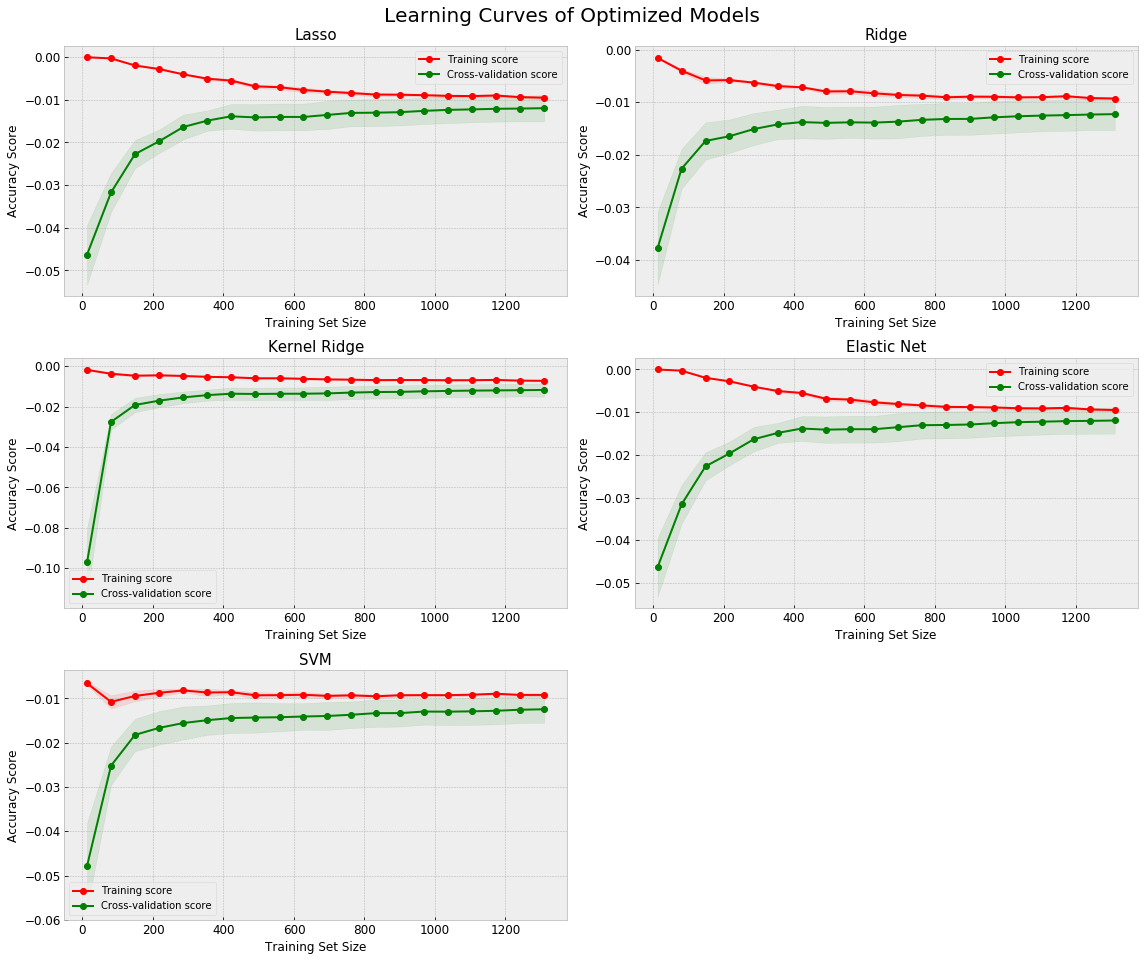

In [70]:
'''Now plot learning curves of the optimized models in subplots.
For computational reason, I am omitting XGB, GB, and LGB.'''
plt.figure(figsize = (16,14))
lc_models = [lasso_opt, ridge_opt, kernel_ridge_opt, elastic_net_opt, svm_opt]
lc_labels = ['Lasso', 'Ridge', 'Kernel Ridge', 'Elastic Net', 'SVM']

for ax, models, labels in zip (range(1,6), lc_models, lc_labels):
    plt.subplot(3,2,ax)
    plot_learning_curve(models)
    plt.title(labels, fontsize = 15)
plt.suptitle('Learning Curves of Optimized Models', fontsize = 20)
plt.tight_layout(rect = [0, 0.03, 1, 0.97])

**All of the model are doing okay in terms of bias-variance tradeoff except kernel ridge(just a bit of high bias or low variance and hence underfitting). Since training and validation curves haven't yet converged, adding more instances might help for lasso, ridge, elastic net and svm. And for kernel ridge, increasing model's complexity (perhaps adding more features) might help.**

**Can we further improve our model? May be we can! In the following section we would introduce ensemble technique and try to improve our position on leaderboard.**

# 12.Introduction to Ensemble <a id="12"></a>
**Ensembles combine predictions from different models to generate a final prediction, and the more models we include the better it performs. Better still, because ensembles combine baseline predictions, they perform at least as well as the best baseline model. Most of the errors from a model’s learning are from three main factors: variance, noise, and bias. By using ensemble methods, we’re able to increase the stability of the final model and reduce the errors caused by bias, variance, and noise. By combining many models, we’re able to (mostly) reduce the variance, even when they are individually not great, as we won’t suffer from random errors from a single source. The main principle behind ensemble modelling is to group weak learners together to form one strong learner.**

**To implement an ensemble we need three basic things:**
* A group of base learners that generate predictions.
* A meta learner that learns how to best combine these predictions outputed by base learners.
* And finally a method for splitting the training data between the base learners and the meta learner.

**An ensemble works best if:**
* There is a less correlation in the base models' predictions.
* We increase the number of base learners though it might slow the process down.

**Ensemble methods can be divided into two, i.e., **
1. Simple Ensemble Method 2. Advanced Ensemble Method

## 12.1 Simple Ensemble Methods <a id="12.1"></a>
They're the simpliest yet so useful form of ensembles. They can be further categorised into
* Voting,
* Averaging, and
* Weighted Average.

**Being a regression problem, we would perform averaging only. Before performing averaging ensemble, we need to investigate the correlations among the base models' predictions so that we can choose the most diverse model that would perform better than correlated models. Let's do that:**

In [71]:
'''Data frame of our optimized base model predictions.'''
base_model_prediction = pd.DataFrame({'LGB':lgb_opt.predict(df_test_final), 'Lasso':lasso_opt.predict(df_test_final), 'Ridge':ridge_opt.predict(df_test_final), 'GB':gb_opt.predict(df_test_final), 'Kernel Ridge':kernel_ridge_opt.predict(df_test_final),'Elastic Net':elastic_net_opt.predict(df_test_final), 'XGB':xgb_opt.predict(df_test_final), 'SVM':svm_opt.predict(df_test_final)})
bold('**All the Base Model Predictions:**')
display(base_model_prediction.head())

**All the Base Model Predictions:**

LGB      Lasso      Ridge         GB  Kernel Ridge  Elastic Net  \
0  11.739351  11.681803  11.682466  11.712084     11.690983    11.681755   
1  11.952085  11.983817  11.968683  11.968554     12.007951    11.983750   
2  12.136771  12.104024  12.102390  12.162905     12.118397    12.104003   
3  12.174887  12.201175  12.196572  12.163504     12.185863    12.201207   
4  12.171194  12.208492  12.191684  12.098118     12.189228    12.208306   

         XGB        SVM  
0  11.725884  11.698735  
1  12.022275  11.985991  
2  12.137475  12.112720  
3  12.187416  12.196261  
4  12.154102  12.167346

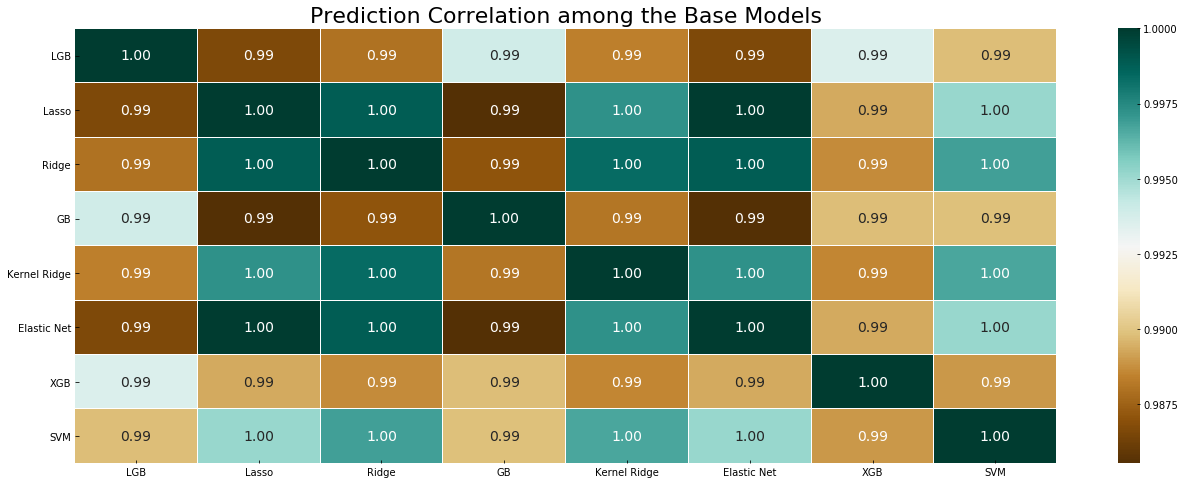

In [72]:
"""Let's visualize the correlations among the predictions of base models."""
fig, ax = plt.subplots(figsize = (22, 8))
sns.heatmap(base_model_prediction.corr(), annot = True, cmap ='BrBG', ax = ax, fmt='.2f', linewidths = 0.05, annot_kws = {'size': 14})
ax.set_title('Prediction Correlation among the Base Models', fontsize = 22)
plt.show()

**Predictions look pretty similar for all the 8 models. We would like to take kernel ridge, svm, lgb, gb, and ridge as the base models for averaging ensemble method. Now you might wonder why I don't choose lasso and elastic net instead of gb and lgb since the former two are superior  in terms of rmse. As I said earlier, the more diverse our base models are, the more superior our ensemble is. We saw GrLivArea is the top priority for all the 6 models in feature importance section. But the second priority for lasso, ridge, and elastic net was YearBuilt while it was LotArea for xgb, gb, and lgb. That's the variation we need for our ensemble to get better at prediction. If we would choose lasso and elastic net, there would be similarity instead of diversity (well that's just one example, there are many more). So our ensemble would not perform according to our expectation. I encourage you to experiment in this part.**

In [73]:
"""Now let's build a simple averaging ensemble and predict with it."""
y_kernel_ridge = np.expm1(kernel_ridge_opt.predict(df_test_final))
y_svm = np.expm1(svm_opt.predict(df_test_final))
y_lgb = np.expm1(lgb_opt.predict(df_test_final))
y_gb = np.expm1(gb_opt.predict(df_test_final))
y_ridge = np.expm1(ridge_opt.predict(df_test_final))

'''Just average the 5 prediction to form final prediction.'''
avg_ensemble = (y_kernel_ridge + y_lgb + y_svm + y_gb + y_ridge)/5
submission_avg = pd.DataFrame()
submission_avg['Id'] = test.Id
submission_avg['SalePrice'] = avg_ensemble
submission_avg.to_csv('avrage_ensemble.csv', index = False)

**Well what we have done is pretty simple! We have averaged 5 models predictions to make final prediction. One thing to remember is the more diverse our base models are, the more accurate our ensemble will be. The above submission scored *0.11628* on leader board that will take you to top 16% of the competition. Lets try more sophisticated ensemble method to further advance on the leaderboard.**

## 12.2 Advanced Ensemble Methods <a id="12.2"></a>
**Stacking:** Fitting an ensemble with cross-validation is often referred to as stacking, while the ensemble itself is known as the Super Learner. So basically in stacking, the individual models (or base models) are trained on the complete training set; then, the meta-learner is fitted on the outputs (predictions) of those base learners. We will use package *vecstack* to perform stacking that can save you from writing a lot of codes if you implement stacking from scratch.

In [74]:
'''Import stacking method from vecstack.'''
from vecstack import stacking
from sklearn.metrics import mean_squared_error

'''Initialize base models. We will use the same base models as averaging ensemble.'''
base_models = [kernel_ridge_opt, svm_opt, lgb_opt, gb_opt, ridge_opt]

bold('**Performing Stacking...**')
'''Perform stacking.'''
S_train, S_test = stacking(base_models,                # list of base models
                           df_train_final, y_train, df_test_final,   # data
                           regression = True,          # We need regression - set to True)
                                                       
                           mode = 'oof_pred_bag',      # mode: oof for train set, predict test 
                                                       # set in each fold and vote
                           needs_proba = False,        # predict class labels (if you need 
                                                       # probabilities - set to True) 
                           save_dir = None,            # do not save result and log (to save 
                                                       # in current dir - set to '.')
                           metric = mean_squared_error,# metric: callable
                           n_folds = 10,               # number of folds
                           stratified = False,         # stratified split for folds
                           shuffle = True,             # shuffle the data
                           random_state =  seed,       # ensure reproducibility
                           verbose = 1)                # print progress
bold('**Stacking Done...**')

/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



**Performing Stacking...**

task:         [regression]
metric:       [mean_squared_error]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [KernelRidge]
    ----
    MEAN:     [0.01203350] + [0.00248299]
    FULL:     [0.01203426]

model  1:     [SVR]
    ----
    MEAN:     [0.01258582] + [0.00205552]
    FULL:     [0.01258643]

model  2:     [LGBMRegressor]
    ----
    MEAN:     [0.01345281] + [0.00197285]
    FULL:     [0.01345261]

model  3:     [GradientBoostingRegressor]
    ----
    MEAN:     [0.01299561] + [0.00218982]
    FULL:     [0.01299625]

model  4:     [Ridge]
    ----
    MEAN:     [0.01238141] + [0.00231371]
    FULL:     [0.01238235]



**Stacking Done...**

**So now we have OOF from base (or 0 level models) models and we can build level 1 model(meta model). We have 5 base models (level 0 models), so we expect to get 5 columns in S_train and S_test. S_train will be our input feature to train our meta learner and then prediction will be made on S_test after we train our meta learner. And this prediction on S_test is actually the prediction for our test set (X_test). Before we train our meta learner we can investigate S_train and S_test.**

In [75]:
'''Input features for meta learner.'''
bold('**Input Features for Meta Learner:**')
display(S_train[:5])
display(S_train.shape)

**Input Features for Meta Learner:**

array([[12.23946217, 12.21538478, 12.23463596, 12.25654581, 12.22817812],
       [12.1647005 , 12.14155428, 12.06913178, 12.05782224, 12.18917289],
       [12.29295427, 12.29360949, 12.26304852, 12.27677267, 12.29512734],
       [12.05655847, 12.10070167, 12.16665702, 12.04307306, 12.03558289],
       [12.61437708, 12.63445349, 12.64484373, 12.66979715, 12.61707418]])

(1456, 5)

In [76]:
'''Test (prediction) set for meta learner.'''
bold('**Test Set for Meta Learner:**')
display(S_test[:5].shape)
display(S_test.shape)

**Test Set for Meta Learner:**

(5, 5)

(1459, 5)

In [77]:
"""Initialize 1st level model that is our meta learner. We will use kernel ridge."""
super_learner = kernel_ridge_opt 

'''Fit meta learner on the output of base learners.'''
print('Fitting Stacking...')
super_learner.fit(S_train, y_train)
print('Done.')

Fitting Stacking...
Done.


In [78]:
'''Finally predict using super learner.'''
y_pred_super = np.expm1(super_learner.predict(S_test))

'''Make submission with super learner'''
submission_super_learner = pd.DataFrame()
submission_super_learner['Id']= test.Id
submission_super_learner['SalePrice'] = y_pred_super
submission_super_learner.to_csv('Super Learner.csv', index = False) # 0.11607 (stacking) < 0.11628 (averaging)

**This submission scored 0.11607 (slightly better than averaging) on submission that would take you top 13% on the leaderboard.**

# 13.End Note <a id="13"></a>
**Of course, there is always room for improvement. I'm still learning. I've tried to explain everything I could possibly know. Throughtout this notebook, I have tried to keep things as simple as possible. I didn't sacrifice interpretability at the cost of accuracy. Any suggestion is cordially welcomed. May be trying out different base learners and meta learner to improve ensemble further. And if you find my kernel useful, some upvotes will be appreciated. I have also another kernel that might be useful to you as well. I provide some links that I've found useful in creating this notebook.**

**Recommended Readings:**

**1. Vecstack package for stacking ensemble: https://github.com/vecxoz/vecstack**